In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data_path
dir_data = './data/TW'
f_app_train = os.path.join(dir_data, '2020data_pchome1.CSV')
app_train = pd.read_csv(f_app_train)

In [2]:
app_train.head()

,member_id,postal_cd,date_cd,prod_id,goods,department,index,prod_Q,price,MSRP
0,15416142,831,day1,QAAD70-A9006TWM5-000,HP Officejet 7110 A3+ 網路高速印表機,3C,列 印,1,"$6,490",NaN
1,4663689,600,day1,QFAXAS-A900A38S1-001,HappyLife_桌上型微波爐架/烤箱置物架 (YV9799),生活,衛浴,1,$599,NaN
2,8097088,815,day1,QFAAJY-A9009W99R-000,dayneeds_輕型 45x45x160cm 四層電鍍波浪收納鐵架,生活,傢俱,1,$927,"$1,359"
3,15317712,708,day1,QAAS33-A900A7SR4-002,任天堂 Switch Joy-Con 四合一鋁合金 手把充電座(兩色可選),3C,電 玩,1,$690,$990
4,15438512,704,day1,CGAACT-A80423382-005,big5,運動戶外,汽百/記錄器,1,"$1,055","$1,600"


In [3]:
# data processing

# 1. replace MSRP NaN value with price value
# 2. tranform type string to float for price and MSRP column
# 3. price and MSRP multiply prod_Q

import math

price_float = []
MSRP_float = []

for i in app_train.index:
    dollars = app_train['price'][i].replace("$","").replace(",","")
    price_float.append(float(dollars) * app_train['prod_Q'][i])
    if type(app_train['MSRP'][i]) == float:
        if math.isnan(app_train['MSRP'][i]):
            dollars = app_train['price'][i].replace("$","").replace(",","")
            MSRP_float.append(float(dollars) * app_train['prod_Q'][i])
    else:
        dollars = app_train['MSRP'][i].replace("$","").replace(",","")
        MSRP_float.append(float(dollars) * app_train['prod_Q'][i])
        
app_train['price_float'] = price_float
app_train['MSRP_float'] = MSRP_float

app_train = app_train.drop(columns=['MSRP', 'price'])
app_train = app_train.rename(columns={"price_float": "price", "MSRP_float": "MSRP"})

app_train.head()

,member_id,postal_cd,date_cd,prod_id,goods,department,index,prod_Q,price,MSRP
0,15416142,831,day1,QAAD70-A9006TWM5-000,HP Officejet 7110 A3+ 網路高速印表機,3C,列 印,1,6490.0,6490.0
1,4663689,600,day1,QFAXAS-A900A38S1-001,HappyLife_桌上型微波爐架/烤箱置物架 (YV9799),生活,衛浴,1,599.0,599.0
2,8097088,815,day1,QFAAJY-A9009W99R-000,dayneeds_輕型 45x45x160cm 四層電鍍波浪收納鐵架,生活,傢俱,1,927.0,1359.0
3,15317712,708,day1,QAAS33-A900A7SR4-002,任天堂 Switch Joy-Con 四合一鋁合金 手把充電座(兩色可選),3C,電 玩,1,690.0,990.0
4,15438512,704,day1,CGAACT-A80423382-005,big5,運動戶外,汽百/記錄器,1,1055.0,1600.0


In [4]:
# Sum price by department catogory

catogory = app_train.groupby(['department']).sum()
catogory = catogory.drop(columns=['member_id', 'postal_cd'])
catogory = catogory.rename(columns={"price": "price_sum", "MSRP": "MSRP_sum"})
catogory

,prod_Q,price_sum,MSRP_sum
department,,,
3C,20157,86050885.0,104262402.0
休閒,27,140169.0,155869.0
周邊,305,402610.0,413049.0
家電,9358,51124364.0,70826683.0
數位,23,50267.0,50267.0
日用,3,2150.0,2150.0
時尚,3403,14465122.0,19119964.0
書店,9,1960.0,2678.0
生活,27216,35105449.0,61142106.0


In [5]:
# Average price and MSRP

price_average = []
MSRP_average = []
discount_average = []

for i in catogory.index:
    price_average.append(catogory['price_sum'][i] / catogory['prod_Q'][i])
    MSRP_average.append(catogory['MSRP_sum'][i] / catogory['prod_Q'][i])
    discount_average.append(1 - round(catogory['price_sum'][i]/catogory['MSRP_sum'][i], 3))
        
catogory['price_average'] = price_average
catogory['MSRP_average'] = MSRP_average
catogory['Discount_average'] = discount_average

catogory = catogory.sort_values(by='price_sum', ascending=False)
    
catogory

,prod_Q,price_sum,MSRP_sum,price_average,MSRP_average,Discount_average
department,,,,,,
3C,20157,86050885.0,104262402.0,4269.032346,5172.515851,0.175
家電,9358,51124364.0,70826683.0,5463.172045,7568.570528,0.278
生活,27216,35105449.0,61142106.0,1289.882753,2246.550044,0.426
運動戶外,7830,31643542.0,43110050.0,4041.320817,5505.753512,0.266
時尚,3403,14465122.0,19119964.0,4250.697032,5618.561269,0.243
美妝保健,3448,3702815.0,5664496.0,1073.902262,1642.835267,0.346
周邊,305,402610.0,413049.0,1320.032787,1354.259016,0.025
休閒,27,140169.0,155869.0,5191.444444,5772.925926,0.101
衣鞋包錶,16,133530.0,133530.0,8345.625000,8345.625000,0.000


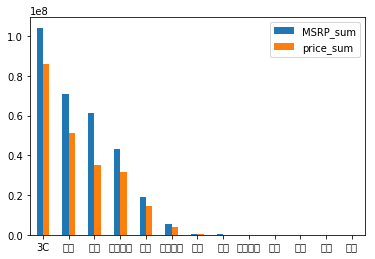

In [6]:
# Price distribution by department

# index = ['3C', 'appliances', 'life', 'OutdooerSport', 'fashion', 'BeautyCare', 'Merchandise', 'Casual', 'apparel', 'Food', 'Digital', 'Daily', 'Book']
index = ['3C', '家電', '生活', '運動戶外', '時尚', '美妝保健', '周邊', '休閒', '衣鞋包錶', '食品', '數位', '日用', '書店']

df = pd.DataFrame({'price_sum': catogory['price_sum'],
                   'MSRP_sum': catogory['MSRP_sum']}, index=index)

ax = df.plot.bar(rot=0)

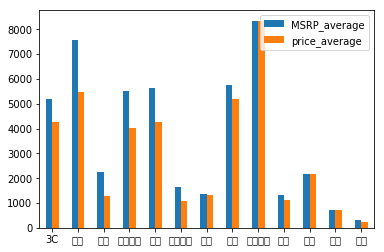

In [7]:
# Price distribution by department

# index = ['3C', 'appliances', 'life', 'OutdooerSport', 'fashion', 'BeautyCare', 'Merchandise', 'Casual', 'apparel', 'Food', 'Digital', 'Daily', 'Book']
index = ['3C', '家電', '生活', '運動戶外', '時尚', '美妝保健', '周邊', '休閒', '衣鞋包錶', '食品', '數位', '日用', '書店']

df = pd.DataFrame({'price_average': catogory['price_average'],
                   'MSRP_average': catogory['MSRP_average']}, index=index)
ax = df.plot.bar(rot=0)